<h1 align="center">Volume 2: The Fourier Transform.</h1>

    Marcelo Leszynski
    Math 321 sec 005
    11/10/20

<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [196]:
from matplotlib import pyplot as plt
from scipy import fftpack
from scipy.io import wavfile
import numpy as np
import IPython
import math

In [197]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [198]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        self._rate = rate  # store the wavfile sampling rate
        self._samples = samples  # store wavfile samples

    # Problems 1.1 and 1.7
    def plot(self, plot_dft=False):
        """Plot the graph of the sound wave (time versus amplitude)."""
        if not plot_dft:
            length = np.size(self._samples) / self._rate
            domain = np.linspace(0, length, np.size(self._samples))

            ax = plt.subplot(111)    
            plt.plot(domain, self._samples)  # plot wave
            plt.xlim([0,length])  # change window limits
            plt.ylim([-32768,32767])
            ax.spines['top'].set_visible(False)  # remove top bar
            ax.spines['right'].set_visible(False)  # remove right bar
            plt.xlabel('Time (seconds)')
            plt.ylabel('Samples')

        else:
            dft = np.abs((fftpack.fft(self._samples))[:len(self._samples) // 2]) 
            ax = plt.subplot(111)
            domain = [k*self._rate / len(dft) for k in range(1,len(dft)+1)]
            plt.plot(domain, dft.real)  # plot wave
           
            plt.xlim([0,44100 / 2])  # change window limits
            ax.spines['top'].set_visible(False)  # remove top bar
            ax.spines['right'].set_visible(False)  # remove right bar
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Magnitude')
        
        plt.show()
    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        if force or self._samples.dtype != 'int16':
            temp_samples = np.int16((self._samples / max(np.abs(self._samples))) * 32767).real
            wavfile.write(filename, self._rate, temp_samples)
        else:
            wavfile.write(filename, self._rate, self._samples)
    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        # error condition
        if np.size(self._samples) != np.size(other._samples):
            raise ValueError("waves sample rates are not equal")
            
        return SoundWave(self._rate, self._samples + other._samples)    

    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        # error condition
        if self._rate != other._rate:
            raise ValueError("waves rates are not equal")
            
        return SoundWave(self._rate, np.append(self._samples, other._samples))
    
    # Problem 2.1
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.1 Incomplete")

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.2 Incomplete")

    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        raise NotImplementedError("Problem 2.4 Incomplete")

### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

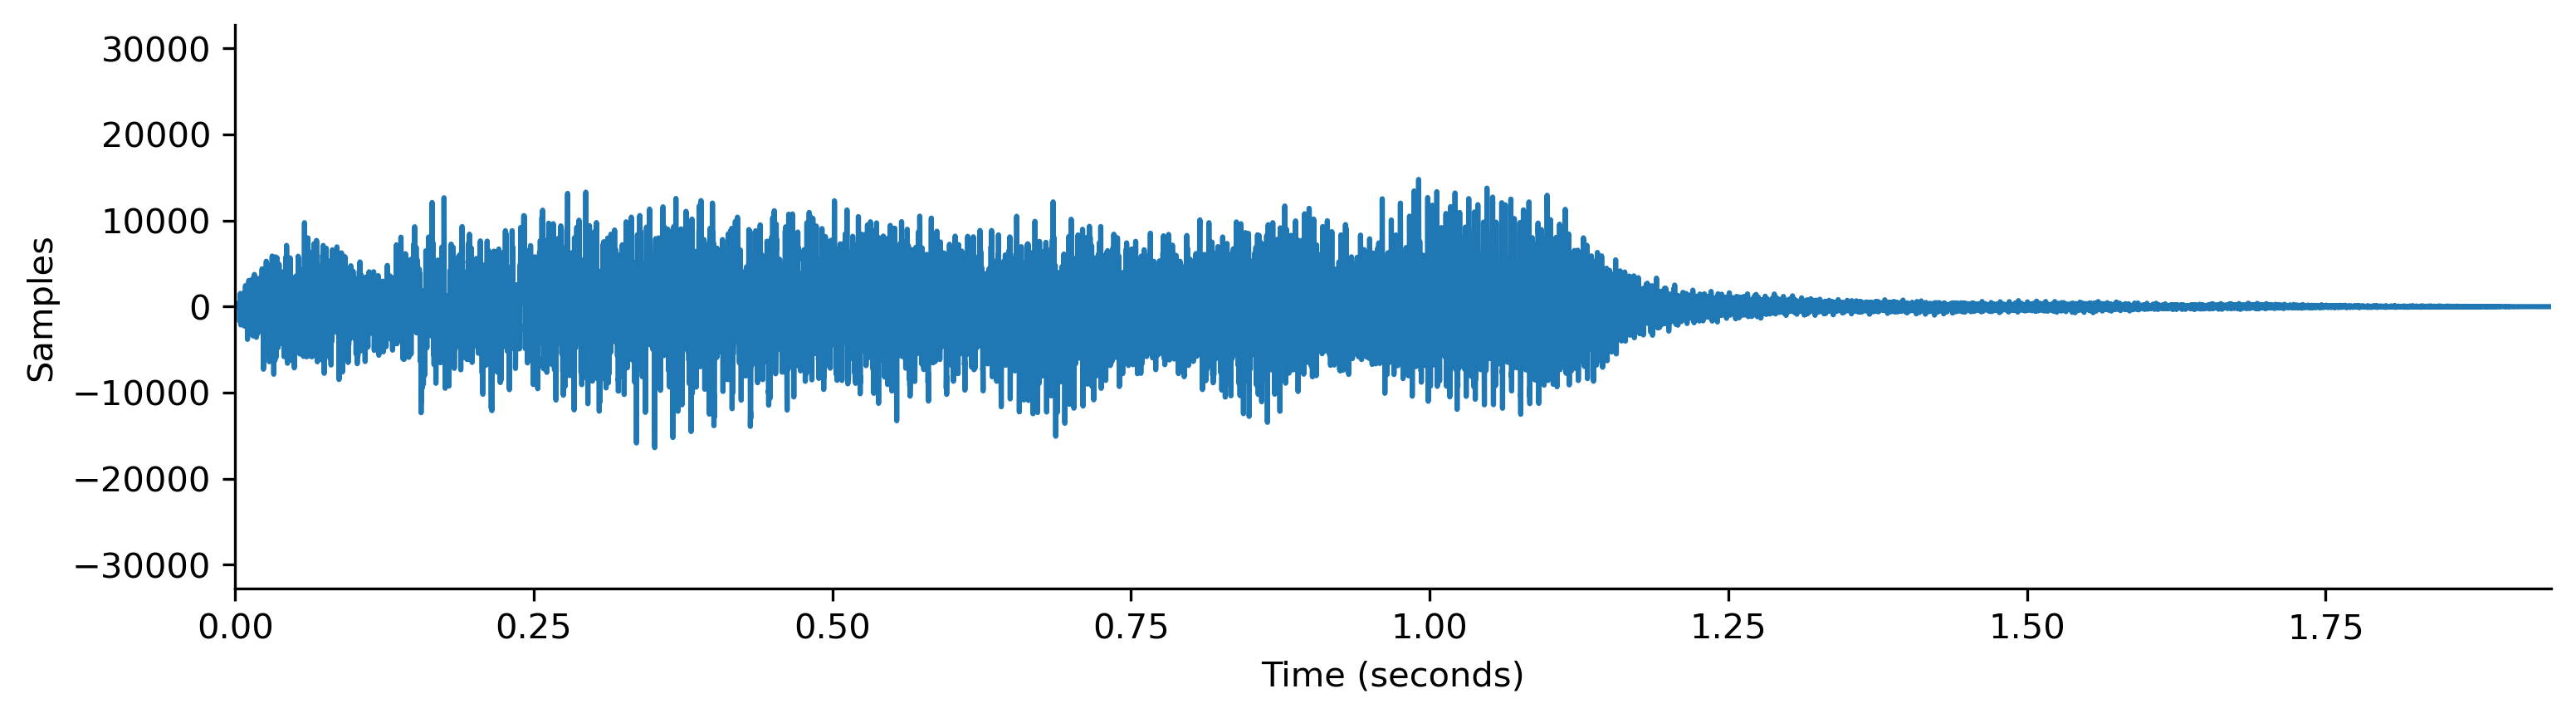

In [199]:
rate, samples = wavfile.read("tada.wav")
my_wave = SoundWave(rate, samples)
my_wave.plot()

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [200]:
my_wave.export('tada_copy.wav')
my_wave.export('tada_forced.wav', force=True)

In [201]:
IPython.display.Audio(filename='tada.wav')

In [202]:
IPython.display.Audio(filename='tada_copy.wav')

In [203]:
IPython.display.Audio(filename='tada_forced.wav')

### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [204]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    r = 44100  # store the sample rate
    domain = np.linspace(0, duration, duration*r)
    samples = np.array([math.sin(2*math.pi*frequency*x) for x in domain])
    
    return SoundWave(r, samples)

In [205]:
a_wave = generate_note(440, 2)  # create a 2-second A tone
IPython.display.Audio(rate=a_wave._rate, data=a_wave._samples)

### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [206]:
# create an A sinusoidal wave
a_wave = generate_note(440,3)
# create an C sinusoidal wave
c_wave = generate_note(523.25,3)
# create an E sinusoidal wave
e_wave = generate_note(659.25,3)

a_min_chord = a_wave + c_wave + e_wave  # create the minor chord
IPython.display.Audio(rate=a_min_chord._rate, data=a_min_chord._samples)

In [207]:
a_arpegg = a_wave >> c_wave >> e_wave  # create the minor chord
IPython.display.Audio(rate=a_arpegg._rate, data=a_arpegg._samples)

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [208]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    # Initialize variables ##########
    n = np.size(samples)  
    m = np.arange(n).reshape(n,1)
    W = np.exp((-2j * np.pi/n) * m @ m.T)
    
    # Compute and return the DFT #########
    return W @ samples / n

In [209]:
test_array = np.random.rand(4)
np.allclose(simple_dft(test_array), (1/4)* fftpack.fft(test_array))

True

### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [210]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    n = len(samples)
    
    if n <= threshold:  # if the number if samples is below the threshold, solve naively
        return simple_dft(samples)
    else:
        f_even = simple_fft(samples[::2])  # recursively find FFT of even indexed entries
        f_odd = simple_fft(samples[1::2])  # recursively find FFT of odd indexed entries
        w = np.exp((-2j * np.pi/n) * np.arange(n))
        first_sum = f_even + w[:n//2] * f_odd
        second_sum = f_even + w[n//2:] * f_odd
        return 0.5 * np.concatenate([first_sum, second_sum])

In [211]:
test_array = np.random.randint(-32768, 32767, 8192, dtype=np.int16)
%time my_dft = simple_dft(test_array)
%time my_fft = simple_fft(test_array)
%time scipy_fft = (1/8192) * fftpack.fft(test_array)
np.allclose(my_fft, scipy_fft)

CPU times: user 4.23 s, sys: 496 ms, total: 4.73 s
Wall time: 4.09 s
CPU times: user 606 ms, sys: 375 ms, total: 981 ms
Wall time: 391 ms
CPU times: user 843 µs, sys: 89 µs, total: 932 µs
Wall time: 686 µs


True

### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

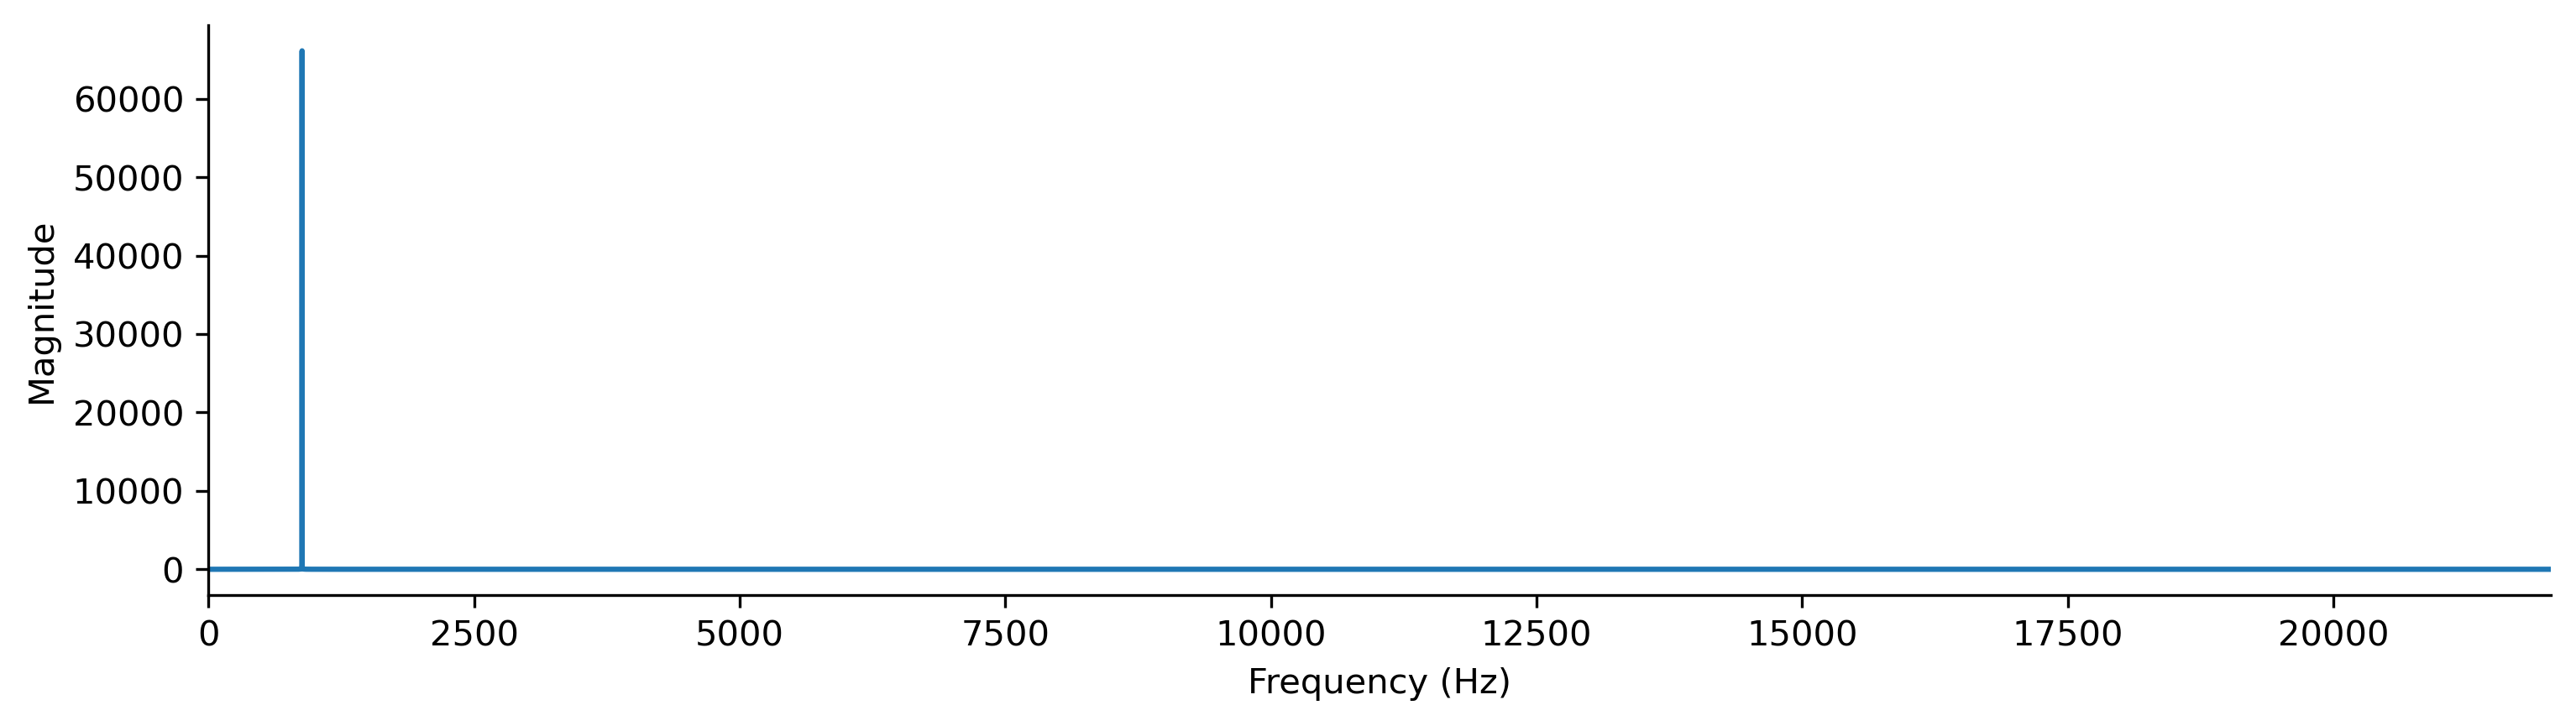

In [212]:
a_wave.plot(True)

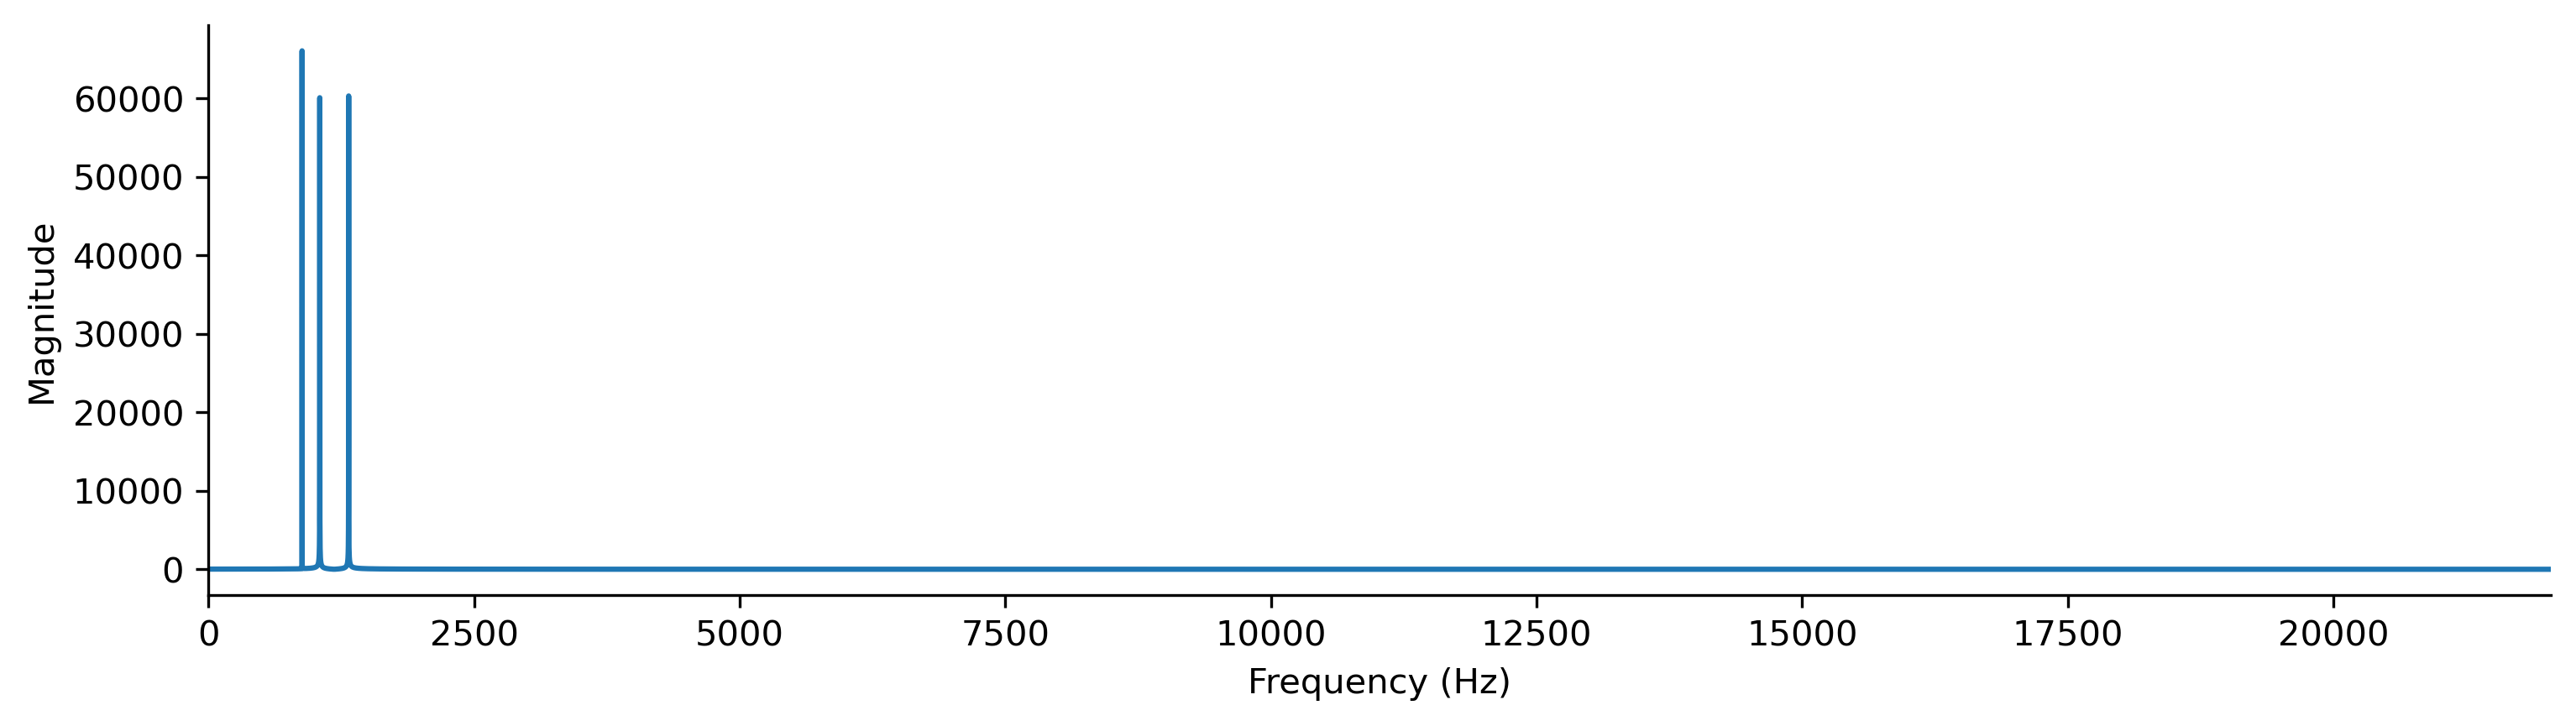

In [213]:
a_min_chord.plot(True)

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

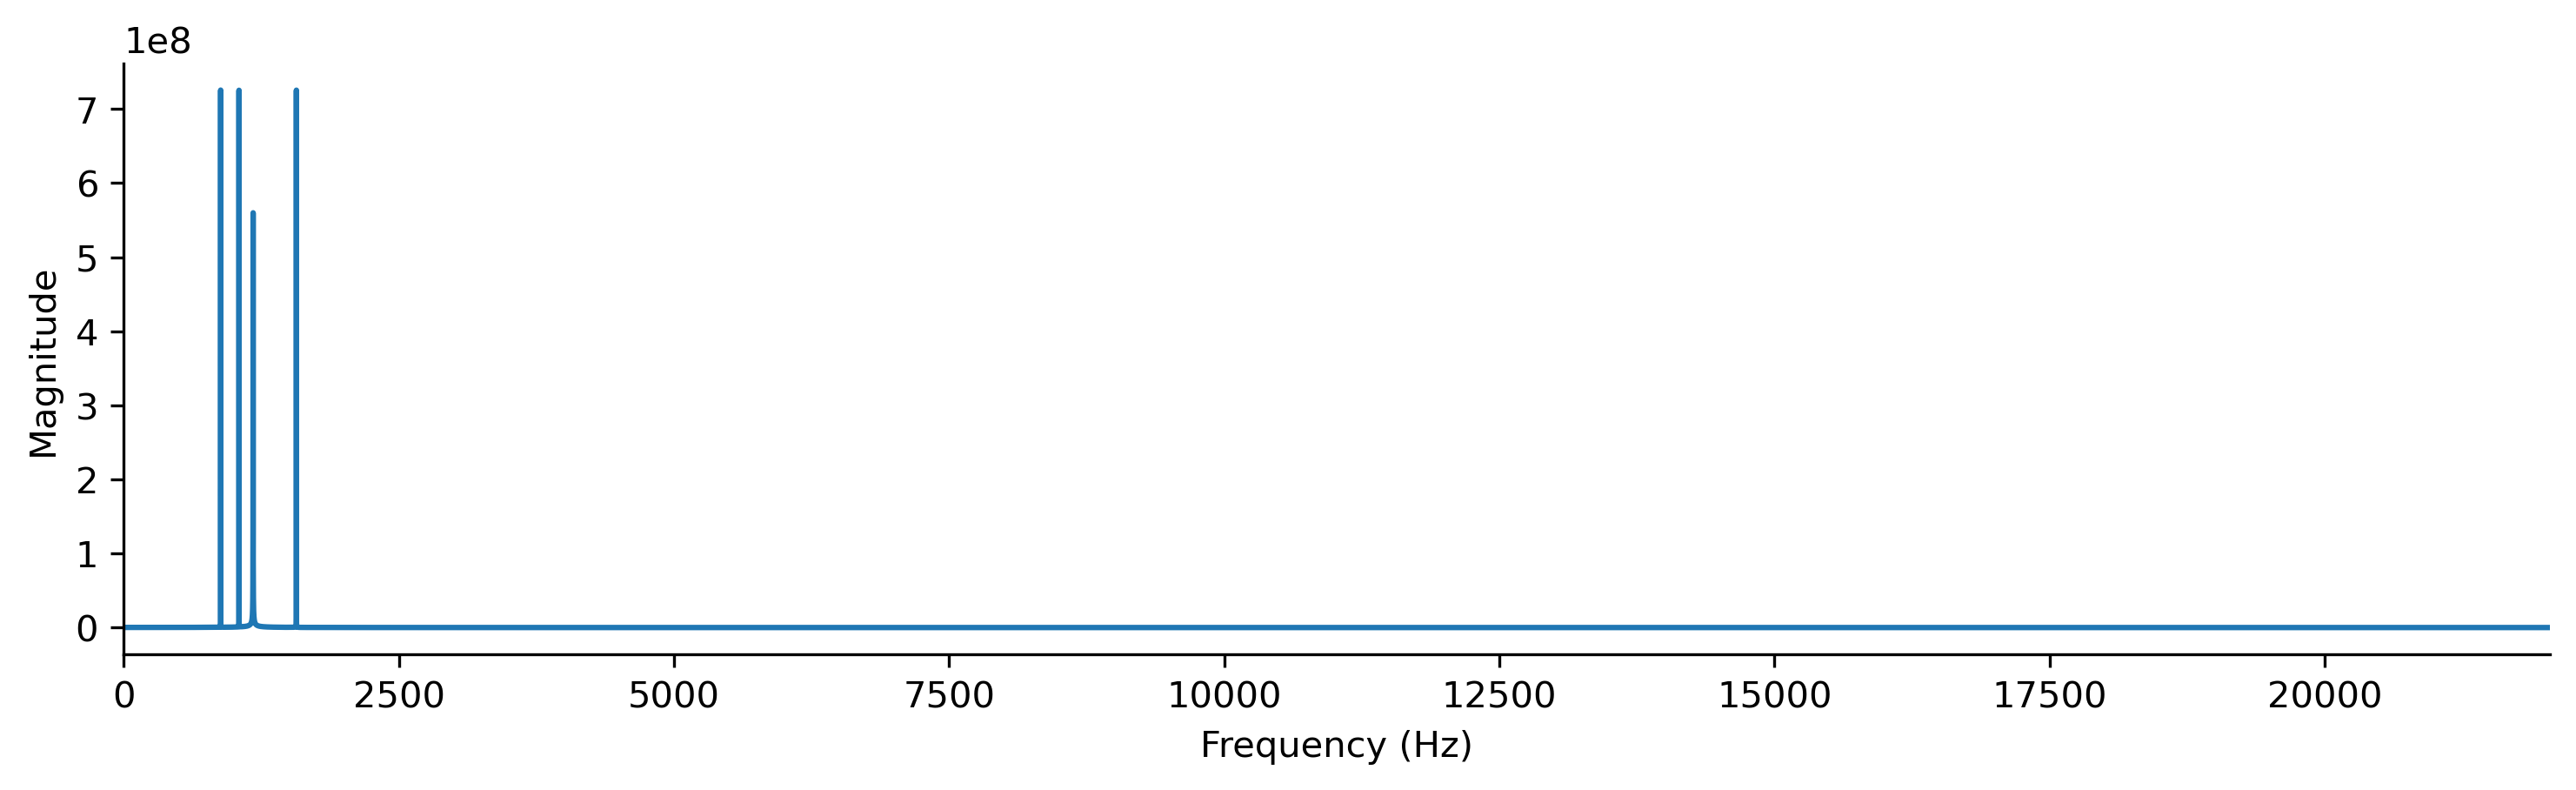

In [216]:
rate, samples = wavfile.read("mystery_chord.wav")
mys_wave = SoundWave(rate, samples)
mys_wave.plot(True)

In [218]:
dft = np.abs((fftpack.fft(mys_wave._samples))[:len(mys_wave._samples) // 2])
indices = np.argsort(dft)[-4:]
note_frequencies = indices * rate / len(samples)
print(note_frequencies)

[587.5  523.25 784.   440.  ]


The notes are...
D, C, G, A

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

### The year on the sticker is...